<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/ivan-private-Lab6/Lab6/ivan-private_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Optimization and learning**
**Ivan Zivkovic**

# **Abstract**

In this lab the gradient descent method will be implemented to be able to solve a minimization problem of the type:
$$\min_{x \in R^n} f(x)$$
$$f : R^n \rightarrow R$$ 

# **About the code**

This report is written by Ivan Zivkovic (ivanzi@kth.se)

In [16]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [17]:
# Load neccessary modules.


import numpy as np
import matplotlib.pyplot as plt


from typing import TypeAlias, Callable, Tuple
NumpyVector_t: TypeAlias = np.ndarray
NumpyMatrix_t: TypeAlias = np.ndarray

# **Introduction**

When trying to find a minimum of a cost function $f : R^n \rightarrow R$ there are several methods that can be used. One good method is the gradient descent method which updates the current point in the direction of the negative gradient. This iterative method keeps going until the gradient is zero (or close to it with a tolerance) which it will be when a local minimum has been found. If the cost function is convex, the local minimum is also a global minimum. 

# **Method**

## **Gradient descent method in $R^n$**

The gradient descent method can be described with the update formula:
$$x^{(k+1)} = x^{(k)} - \alpha^{(k)} \nabla f(x^{(k)})$$
where $\alpha$ is the step length. 

The iteration will keep on going until $\nabla f < TOL$, or the maximum number of iterations is reached. In practice, this max number of iterations should not be the reason for the algorithm to terminate. 



In [18]:
def grad(f: Callable[[NumpyVector_t], float], x: NumpyVector_t) -> NumpyVector_t:
    grad_f = np.zeros(x.shape)
    h = 10**-9
    
    for i in range(len(grad_f)):
        dx = np.zeros(x.shape)
        dx[i] = h
        grad_f[i] = (f(x + dx) - f(x)) / h
    
    return grad_f


def gradient_descent(f: Callable[[NumpyVector_t], float], x0: NumpyVector_t, max_iterations=10**6, TOL=10**-9) -> NumpyVector_t:
    x = x0[:]
    for i in range(max_iterations):
        grad_f = grad(f, x)
        
        if np.linalg.norm(grad_f) < TOL:
            break
        alpha = 0.05
        x = x - alpha * grad_f
        
    return x
    

# **Results**


## **Gradient descent method in $R^n$**

To test the gradient descent method, the convex cost function $f(x) = x_1^2 + x_2^2 - 2x_1, \quad x \in R^2$ will be used. It has one minimum point found in $x=(1, 0)$. 

Expected minimum point: [1 0]
Approximated minimum point with gradient descent: [ 9.99999965e-01 -5.00000000e-11]
Error: [3.52181898e-08 5.00000000e-11]


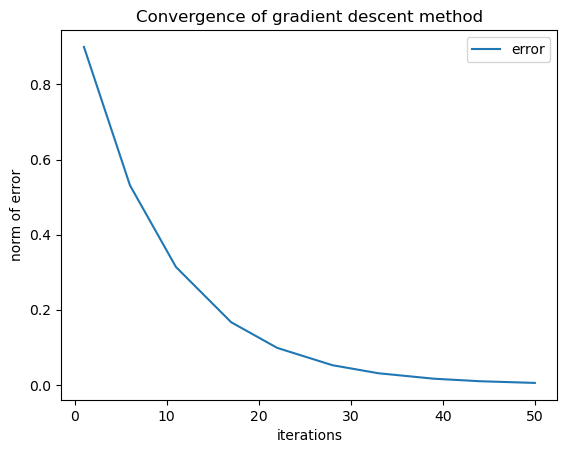

In [19]:
def func(x: NumpyVector_t) -> float:
    x1, x2 = x
    return x1**2 + x2**2 - 2*x1
    
expected_min_point = np.array( [1, 0] )

x0 = np.array( [0, 0] )

approx_min_point = gradient_descent(func, x0)

# Test accuracy 
print(f"Expected minimum point: {expected_min_point}")
print(f"Approximated minimum point with gradient descent: {approx_min_point}")

print(f"Error: {np.abs(approx_min_point - expected_min_point)}")


# Test convergence
iterations = np.linspace(1, 50, 10, dtype=int)
result = np.empty((len(iterations), len(x0)))

for i, iteration in enumerate(iterations):
    result[i, :] = gradient_descent(func, x0, max_iterations=iteration)
    
error = np.empty(iterations.shape)
for i in range(len(iterations)):
    error[i] = np.linalg.norm(result[i] - expected_min_point)

plt.title("Convergence of gradient descent method")
plt.plot(iterations, error, label="error")
plt.xlabel("iterations")
plt.ylabel("norm of error")
plt.legend()

plt.show()

# **Discussion**

As we can see from the results, the gradient descent method is able to find the minimum point of the convex cost function with a small error. One drawback of this gradient descent implementation is that if the function is not convex, it is possible that the function will return a point that is a local minimum but not a global one. 

One possible improvement for this implementation which will lead to a faster convergence is to not have a constant $\alpha$, but to solve another minimizaiton problem to find the best possible $\alpha$. 

The step length $\alpha^{(k)}$ can be chosen by an iterative line search method, where the objective function is minimized along the search direction 
$$f(s) = f(x^{(k)} - s \nabla f(x^{(k)}))$$